# <b>Manipulação de Banco de Dados com SQLite

## <b> Criação do BD 

In [1]:
import sqlite3
import random 
import datetime
import matplotlib.pyplot as plt
import os

# abrir o gráfico na mesma janela
%matplotlib notebook 

# Importando o BD e o remove caso ele já exista
os.remove("googleplay.db") if os.path.exists("googleplay.db") else None

In [2]:
# Conexão com o BD
con = sqlite3.connect('googleplay.db')

In [3]:
# verificando o tipo de conexão
type(con)

sqlite3.Connection

In [4]:
# criando um cursor para acessar os registros
cursor = con.cursor()

In [5]:
# verificando o tipo de conexão
type(cursor)

sqlite3.Cursor

## <b> Manipulação 

In [6]:
# Instrução SQL para criação de tabelas
sql_create = 'create table App '\
'(key integer primary key, '\
'nome varchar(100), '\
'categoria varchar(140),'\
'installs int,'\
'tamanho int)'

In [7]:
# executando a instrução no cursor
cursor.execute(sql_create)

In [8]:
# Criando outra sentença SQL para inserir registros ainda sem valores
sql_insert = 'insert into App values (?, ?, ?, ?, ?)'

In [9]:
# Definindo os valores a serem inseridos na tabela
# Dados
values = [(0, 'Candy Camera', 'ART_AND_DESIGN', 10.000, 19),
          (1, 'Coloring Book', 'ART_AND_DESIGN', 500.000, 14),
          (2, 'Sketch', 'ART_AND_DESIGN', 50.000, 25),
          (3, 'Ibis Paint', 'ART_AND_DESIGN', 10.000, 31),
          (4, 'Hush - Beauty', 'BEAUTY', 50.000, 17),
          (5, 'Indeed', 'BUSINESS', 50.000, 12)         ]

In [10]:
# Inserindo os registros
for v in values:
    cursor.execute(sql_insert, v)

In [11]:
# gravando a transação
con.commit()

In [12]:
# criando outra sentença SQL para selecionar registros
sql_select = 'select * from App'

In [13]:
# seleciona todos os registros e recupera os registros
cursor.execute(sql_select)
dados = cursor.fetchall()

In [14]:
#  exibe os valores recebidos na transação fetchall
for linha in dados:
    print ('App Chave: %d, Nome: %s, Categoria: %s, Instalações: %d, Tamanho: %dM\n' %linha)

App Chave: 0, Nome: Candy Camera, Categoria: ART_AND_DESIGN, Instalações: 10, Tamanho: 19M

App Chave: 1, Nome: Coloring Book, Categoria: ART_AND_DESIGN, Instalações: 500, Tamanho: 14M

App Chave: 2, Nome: Sketch, Categoria: ART_AND_DESIGN, Instalações: 50, Tamanho: 25M

App Chave: 3, Nome: Ibis Paint, Categoria: ART_AND_DESIGN, Instalações: 10, Tamanho: 31M

App Chave: 4, Nome: Hush - Beauty, Categoria: BEAUTY, Instalações: 50, Tamanho: 17M

App Chave: 5, Nome: Indeed, Categoria: BUSINESS, Instalações: 50, Tamanho: 12M



## <b> Trabalhando com Funções

In [15]:
# Função para criar uma tabela
def create_table(query):
    cursor.execute(query)
            
# Função para inserir uma linha
def data_insert(line):
    cursor.execute(line)
        
# Usando variáveis para inserir dados    
def data_insert_dados(identificador, nome, categoria, installs, tamanho):
    cursor.execute("INSERT INTO App (key, nome, categoria, installs, tamanho) VALUES (?,?,?,?,?)", (identificador, nome, categoria, installs, tamanho))    
    
# Leitura de dados
def leitura_de_todos_apps():
    cursor.execute("SELECT * FROM App")
    for linha in cursor.fetchall():
        print(linha)
          
# Leitura de registros específicos
def leitura_de_determinados_registros():
    cursor.execute("SELECT * FROM App WHERE categoria == 'BUSINESS'")
    for linha in cursor.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    cursor.execute("SELECT nome FROM App")
    for linha in cursor.fetchall():
        print(linha)  
        
# Update
def atualiza_dados():
    cursor.execute("UPDATE App SET tamanho = 22 WHERE tamanho = 19")
    con.commit()
    
# Delete
def remove_dados():
    cursor.execute("DELETE FROM App WHERE tamanho < 20")
    con.commit()
    
def dados_grafico():
    cursor.execute("SELECT tamanho, nome FROM App")
    tam = []
    nomes = []
    dados = cursor.fetchall()
    
    for linha in dados:
        tam.append(linha[0])
        nomes.append(linha[1])
        
    if (len(tam)) < 4:
        plt.figure(figsize=(8, 8), dpi=60)
    else:
        plt.figure(figsize=(12, 10), dpi=60)
        
    plt.bar(nomes, tam)
    plt.show()

In [16]:
# query para criação de tabelas que será passada para a função
query = 'CREATE TABLE IF NOT EXISTS '\
        'Genero(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, '\
                  'genero TEXTO)'
create_table(query)

In [17]:
# query para inserção de tabelas que será passada para a função
linha = 'INSERT into Genero (id, genero) values (1, "BOOKS AND REFERENCE")'
data_insert(linha)

In [18]:
# visualiza todas os registros 
leitura_de_todos_apps()

(0, 'Candy Camera', 'ART_AND_DESIGN', 10, 19)
(1, 'Coloring Book', 'ART_AND_DESIGN', 500, 14)
(2, 'Sketch', 'ART_AND_DESIGN', 50, 25)
(3, 'Ibis Paint', 'ART_AND_DESIGN', 10, 31)
(4, 'Hush - Beauty', 'BEAUTY', 50, 17)
(5, 'Indeed', 'BUSINESS', 50, 12)


In [19]:
leitura_de_determinados_registros()

(5, 'Indeed', 'BUSINESS', 50, 12)


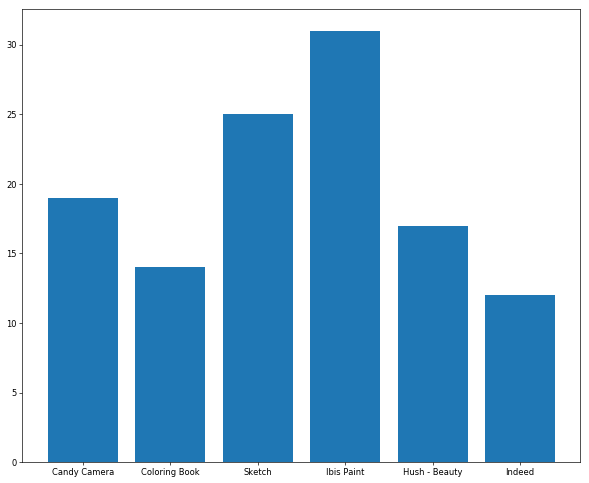

In [20]:
# visualização dos apps e seus tamanhos
dados_grafico()

In [21]:
# lê apenas os nomes dos Apps
leitura_colunas()

('Candy Camera',)
('Coloring Book',)
('Sketch',)
('Ibis Paint',)
('Hush - Beauty',)
('Indeed',)


In [22]:
# atualiza os tamanhos 
atualiza_dados()
leitura_de_todos_apps()

(0, 'Candy Camera', 'ART_AND_DESIGN', 10, 22)
(1, 'Coloring Book', 'ART_AND_DESIGN', 500, 14)
(2, 'Sketch', 'ART_AND_DESIGN', 50, 25)
(3, 'Ibis Paint', 'ART_AND_DESIGN', 10, 31)
(4, 'Hush - Beauty', 'BEAUTY', 50, 17)
(5, 'Indeed', 'BUSINESS', 50, 12)


In [23]:
# remove os apps menores que 20 M
remove_dados()
leitura_de_todos_apps()

(0, 'Candy Camera', 'ART_AND_DESIGN', 10, 22)
(2, 'Sketch', 'ART_AND_DESIGN', 50, 25)
(3, 'Ibis Paint', 'ART_AND_DESIGN', 10, 31)


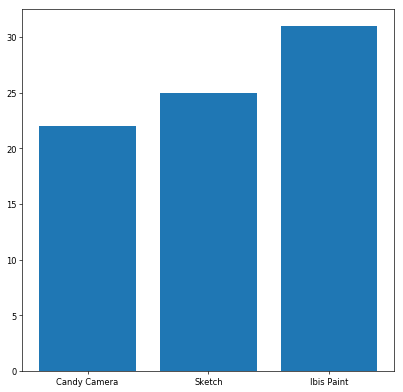

In [24]:
# visualização dos apps e seus tamanhos
dados_grafico()

In [25]:
# Fecha a conexão
con.close()